# NO CATEGORICAL FITTING


# Kmeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import os
os.environ["OMP_NUM_THREADS"] = "8"

from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from kneed import KneeLocator

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform

# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
df = pd.read_csv("train_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [6]:
nostrings = df.drop(columns = ['name','explicit','artists','album_name','genre', 'time_signature', 'key'])

In [7]:
nostrings

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,241760,46,0.690,0.513,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221
1,444000,0,0.069,0.196,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596
2,333506,3,0.363,0.854,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628
3,269800,23,0.523,0.585,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880
4,307651,25,0.643,0.687,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956
...,...,...,...,...,...,...,...,...,...,...,...
14995,432026,0,0.554,0.657,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319
14996,182746,44,0.103,0.860,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323
14997,400091,43,0.799,0.535,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000
14998,197250,37,0.511,0.970,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044


In [8]:
X = nostrings.values

In [9]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=94)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=94)

In [11]:
df["kmeans.labels_"] = kmeans.labels_

In [12]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.536000,0.2810,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.934000,0.3600,0.0336,75.596,4.0,iranian,0
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.800000,0.2620,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.6370,143.956,4.0,happy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,0,0,Autechre,EP7,0.554,0.657,1,-14.232,0.0558,0.016000,0.615000,0.1320,0.0335,117.319,4.0,idm,3
14996,Natural Environment Sounds: To Improve Sleep a...,182746,0,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,0.0595,0.548000,0.940000,0.1230,0.0016,92.323,3.0,sleep,0
14997,Psychological Attack,400091,0,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,0.0594,0.001830,0.857000,0.0713,0.0708,126.000,4.0,techno,3
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,0,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,0.0531,0.000337,0.000014,0.4020,0.2700,160.044,4.0,breakbeat,1


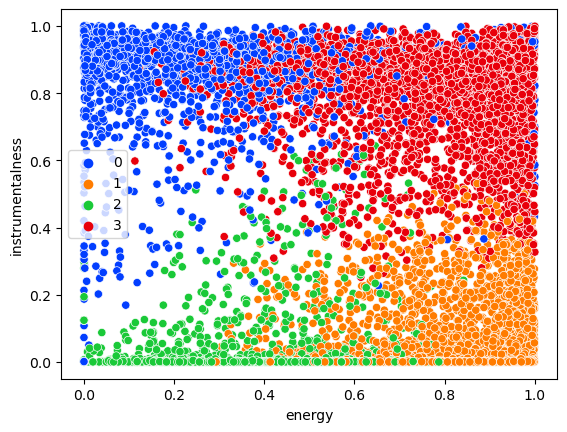

In [13]:
sns.scatterplot(data=df, 
                x="energy",
                y="instrumentalness",
                hue=kmeans.labels_,
                palette="bright")
plt.show()

In [14]:
kmeans.cluster_centers_

array([[0.05072825, 0.23868083, 0.37954033, 0.26354843, 0.57277098,
        0.06622253, 0.8053488 , 0.84777568, 0.18259332, 0.18865633,
        0.45902802],
       [0.05739452, 0.31083183, 0.60364915, 0.8000057 , 0.83001782,
        0.10354306, 0.11676954, 0.031597  , 0.24441066, 0.53957789,
        0.58855334],
       [0.05276402, 0.3644503 , 0.56321323, 0.45906072, 0.75192427,
        0.08024675, 0.65317503, 0.02007798, 0.19980398, 0.44404357,
        0.52919101],
       [0.06830343, 0.20807524, 0.57528962, 0.76490505, 0.77596546,
        0.08037638, 0.0811981 , 0.78482952, 0.19986377, 0.35901946,
        0.57809807]])

In [15]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[ 2.17163943e+05,  2.24359978e+01,  3.71949525e-01,
         2.63548426e-01, -1.93534153e+01,  6.21829514e-02,
         8.02127409e-01,  8.47775685e-01,  1.81497764e-01,
         1.87713051e-01,  1.01227154e+02],
       [ 2.44573424e+05,  2.92181925e+01,  5.91576163e-01,
         8.00005703e-01, -5.79985098e+00,  9.72269377e-02,
         1.16302460e-01,  3.15970005e-02,  2.42944194e-01,
         5.36880000e-01,  1.29790725e+02],
       [ 2.25534338e+05,  3.42583281e+01,  5.51948963e-01,
         4.59060721e-01, -9.91436612e+00,  7.53516970e-02,
         6.50562327e-01,  2.00779797e-02,  1.98605154e-01,
         4.41823355e-01,  1.16699848e+02],
       [ 2.89427317e+05,  1.95590724e+01,  5.63783830e-01,
         7.64905045e-01, -8.64770793e+00,  7.54734253e-02,
         8.08733122e-02,  7.84829521e-01,  1.98664588e-01,
         3.57224359e-01,  1.27485076e+02]])

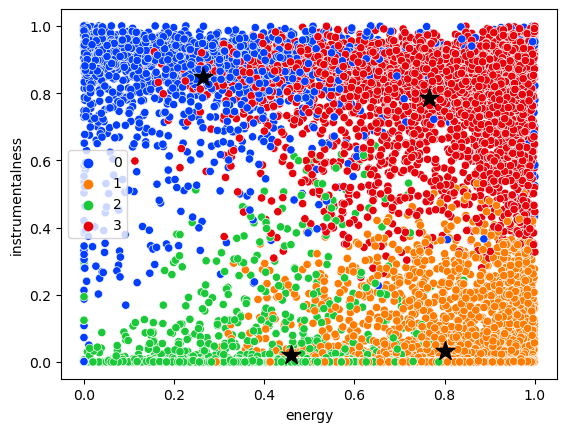

In [16]:
sns.scatterplot(data=df, 
                x="energy", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,3], centers[:,7], c='black', marker='*', s=200)
plt.show()

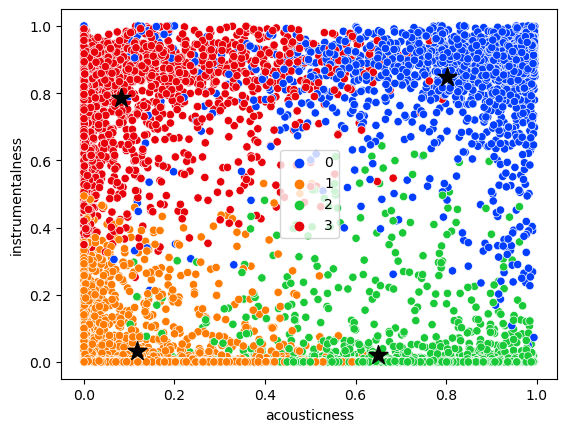

In [17]:
sns.scatterplot(data=df, 
                x="acousticness", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,6], centers[:,7], c='black', marker='*', s=200)
plt.show()

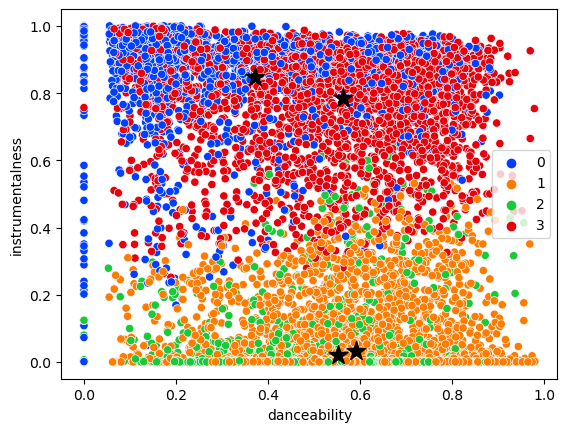

In [18]:
sns.scatterplot(data=df, 
                x="danceability", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,2], centers[:,7], c='black', marker='*', s=200)
plt.show()

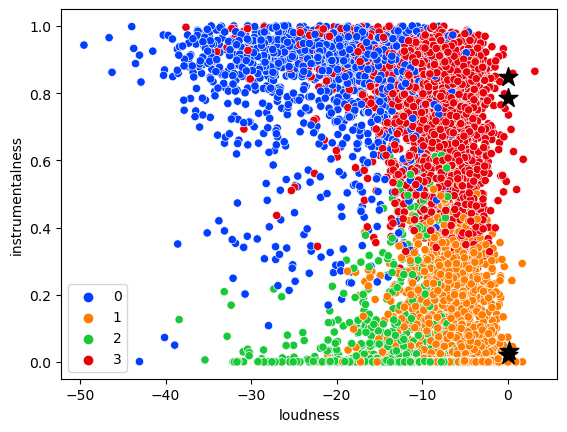

In [19]:
sns.scatterplot(data=df, 
                x="loudness", 
                y="instrumentalness", 
                hue=kmeans.labels_, 
                palette="bright")

plt.scatter(centers[:,5], centers[:,7], c='black', marker='*', s=200)
plt.show()

In [20]:
##### Remember to do the categorization of the continuous variables to check for "y_mapping"

In [21]:
#sns.pairplot(data=df, hue="kmeans.labels_", palette="bright")
#plt.savefig("pairplot with 4 clusters.png")
#plt.show()

#### Centroid movement for each attribute

In [22]:

norm_centers = kmeans.cluster_centers_

### SSE evaluation

In [23]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([1789, 6837, 3184, 3190], dtype=int64))

In [24]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 4163.750966569518
Silhouette 0.2642446311488538


In [25]:
# how do we select the number of clusters k?

In [26]:
%%time
sse_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

CPU times: total: 40.3 s
Wall time: 9.67 s


In [27]:
%%time
sil_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

CPU times: total: 1min 53s
Wall time: 1min 30s


In [28]:
%%time
sil_list = []
dist = squareform(pdist(X_minmax)) # using a precomputed distance matrix

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sil_list.append(silhouette_score(dist, kmeans.labels_, metric='precomputed'))

CPU times: total: 1min 6s
Wall time: 45.3 s


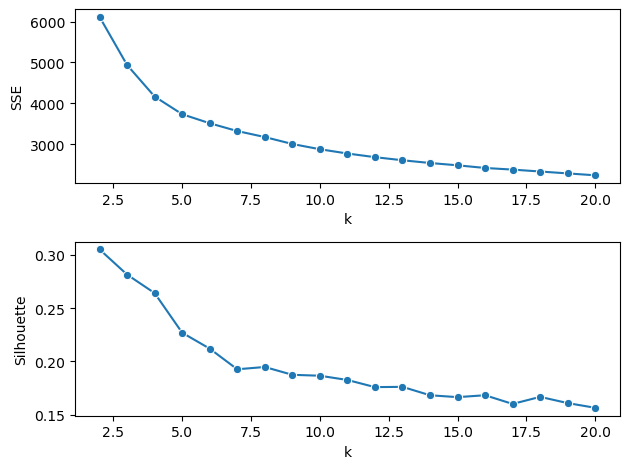

In [29]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(2, len(sse_list) + 2), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(2, len(sil_list)+ 2), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')
#plt.savefig("silhouette 100.png")
plt.tight_layout()

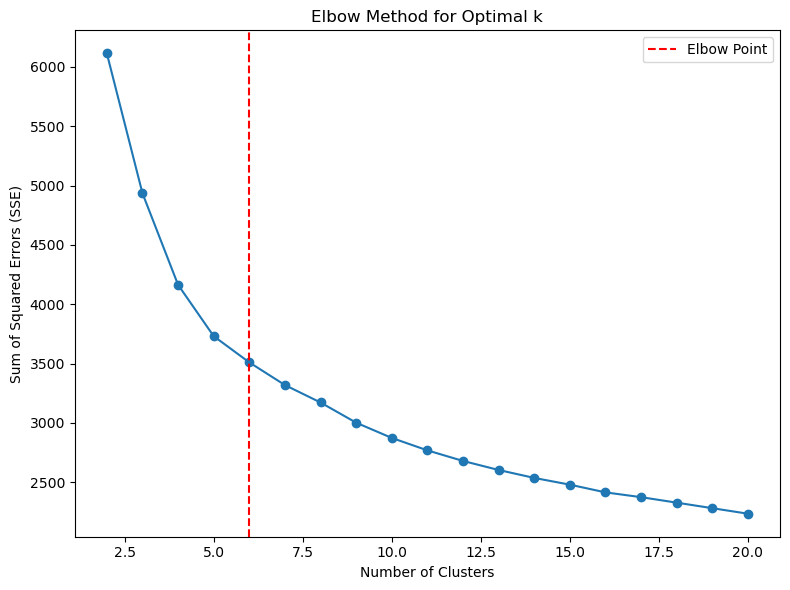

Elbow point (optimal k): 6


In [30]:
# Plotting the SSE curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Finding the elbow point using KneeLocator
kneedle = KneeLocator(range(2, len(sse_list) + 2), sse_list, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

# Highlighting the elbow point on the plot
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

# Displaying the plot
plt.legend()
plt.tight_layout()
plt.show()

print(f"Elbow point (optimal k): {elbow_point}")

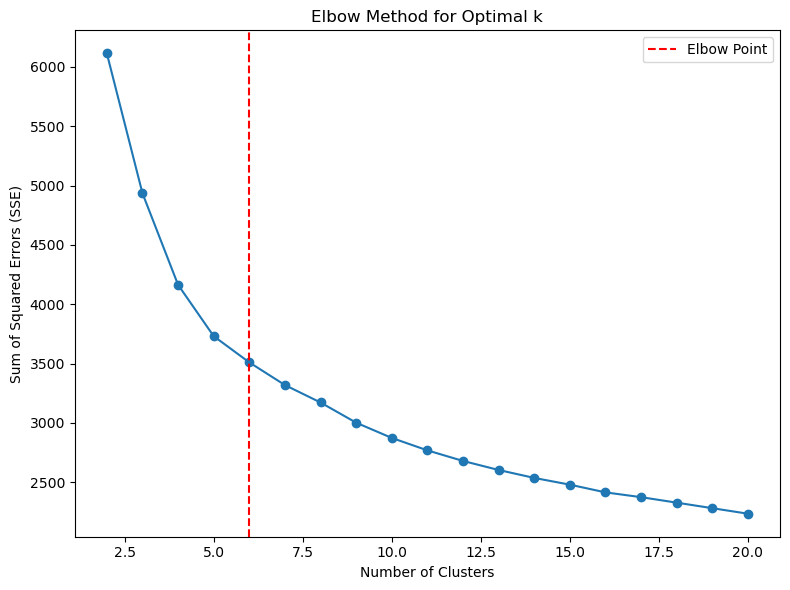

Elbow point (optimal k): 6


In [31]:
# Plotting the SSE curve
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.plot(range(2, len(sse_list) + 2), sse_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Finding the elbow point using KneeLocator
kneedle = KneeLocator(range(2, len(sse_list) + 2), sse_list, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

# Highlighting the elbow point on the plot
plt.axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

# Displaying the plot
plt.legend()
plt.tight_layout()
plt.show()

print(f"Elbow point (optimal k): {elbow_point}")

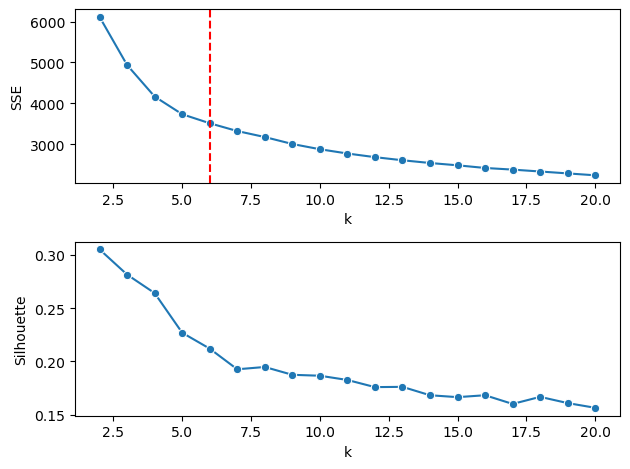

In [32]:
# Your code for creating the subplots and plotting the SSE and silhouette scores
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(2, len(sse_list) + 2), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(2, len(sil_list) + 2), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

# Determine the elbow point for SSE (you might have your own method to find this)
elbow_point = 6  # Replace this with the identified elbow point

# Plot a vertical line at the elbow point for SSE in the first plot
axs[0].axvline(x=elbow_point, color='red', linestyle='--', label='Elbow Point')

plt.tight_layout()
#plt.savefig("silhouette 100 vs.png")
plt.show()

In [33]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4.0,j-dance,3
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4.0,iranian,0
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4.0,black-metal,3
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4.0,happy,1


### Subsetting

#### Cluster label 0

In [34]:
cluster0 = df[df['kmeans.labels_'] == 0]
#cluster0 = cluster0.drop('kmeans.labels_std', axis = 1)
cluster0.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
1,"Daniâl My Son, Where Did You Vanish?",444000,0,0,Siavash Amini,A Trail of Laughters,0.069,0.19600,1,-24.801,0.0805,0.283,0.934,0.360,0.0336,75.596,4.0,iranian,0
8,Shhhh Baby Shusher Mama Shushing Background Fa...,116815,0,45,Baby Sleep;Baby Shushing;Dreams of Dreams,Shhhh Baby Shusher Mama Shushing Background Fa...,0.153,0.11900,6,-25.160,0.0501,0.704,0.913,0.543,0.0342,84.886,4.0,sleep,0
16,Querencia,194648,0,57,Cameron Sinosa,Querencia,0.170,0.00316,5,-38.615,0.0422,0.991,0.931,0.111,0.0946,70.964,3.0,sleep,0
24,Monday Morning Before Work,227320,0,13,Kelpe,Kyverdale Road,0.757,0.15300,8,-23.574,0.0470,0.857,0.952,0.106,0.4760,102.987,4.0,idm,0
29,never had,140487,0,12,Organ Tapes,唱着那无人问津的歌谣 / Chang Zhe Na Wu Ren Wen Jin De Ge...,0.405,0.38900,2,-14.809,0.0419,0.863,0.720,0.134,0.7480,89.271,4.0,techno,0


In [35]:
# Create a dictionary to map colors to values
colors = ['blue']

#sns.pairplot(data=cluster0, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("ppk0 MinMax.png")
#plt.show()

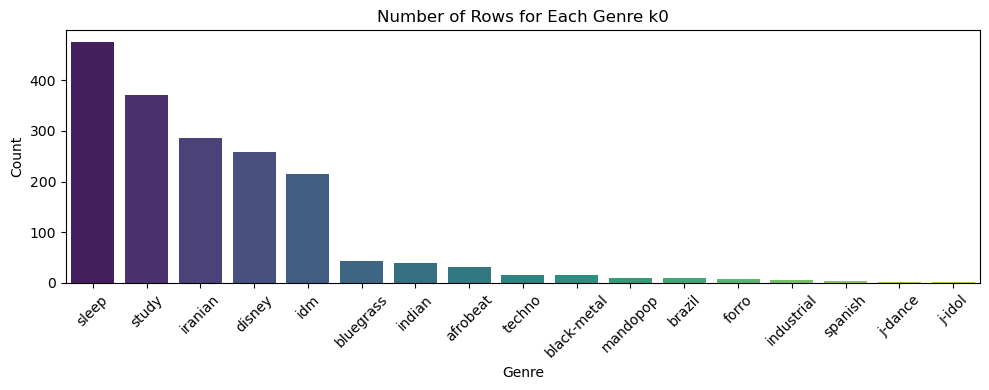

In [36]:
genre_counts = cluster0['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k0')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
#plt.savefig("k0 genre count.png")
plt.show()

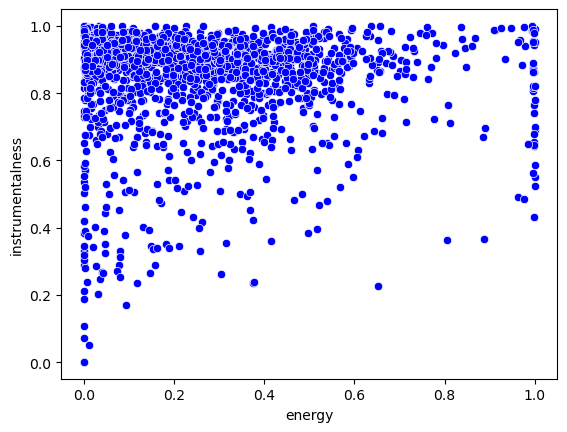

In [37]:
sns.scatterplot(data=cluster0, 
                x="energy", 
                y="instrumentalness", 
                color = 'blue')
#plt.savefig("k0 instr_energy.png")
plt.show()

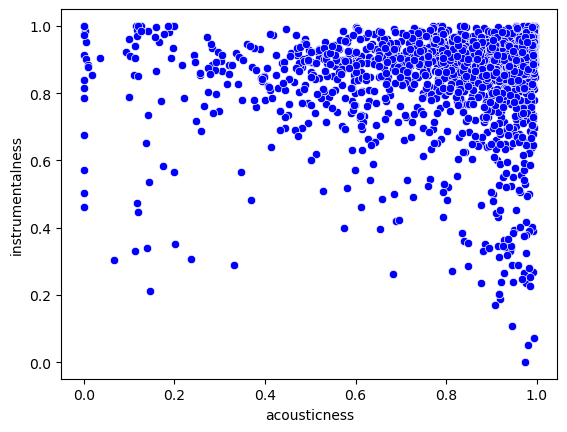

In [38]:
sns.scatterplot(data=cluster0, 
                x="acousticness", 
                y="instrumentalness", 
                color="blue",
               )
#plt.savefig("k0 instr_acous.png")
plt.show()

<Axes: xlabel='loudness', ylabel='instrumentalness'>

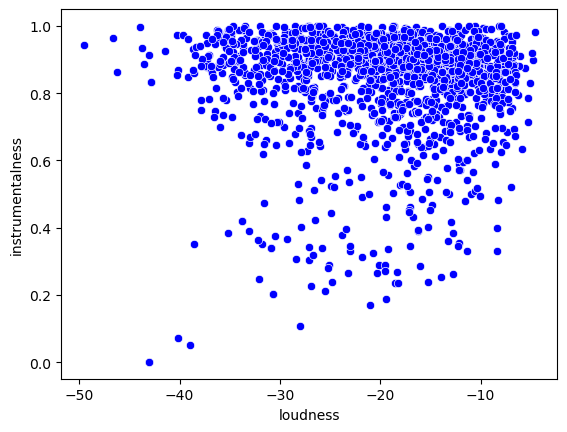

In [39]:
sns.scatterplot(data=cluster0, 
                x="loudness", 
                y="instrumentalness", 
                color="blue",
               )
#plt.savefig("k0 instr_loud.png")
#plt.show()

#### Cluster label 1

In [40]:
cluster1 = df[df['kmeans.labels_'] == 1]
#cluster1 = cluster1.drop('kmeans.labels_std', axis = 1)
cluster1.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
3,Can't Look Away,269800,0,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,0.0765,0.066400,0.001270,0.1170,0.385,140.880,4.0,bluegrass,1
4,Thunderground,307651,0,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,0.0539,0.000576,0.096900,0.2990,0.637,143.956,4.0,happy,1
5,Sick Bubblegum,224266,1,32,Rob Zombie,Hellbilly Deluxe 2 (Standard Explicit),0.642,0.972,5,-3.047,0.0967,0.001520,0.000024,0.3840,0.421,118.035,4.0,industrial,1
6,The Diamond Four,225160,0,27,Momoiro Clover Z,MOMOIRO CLOVER Z,0.777,0.949,2,-2.488,0.0585,0.306000,0.000016,0.2990,0.850,109.992,4.0,j-idol,1
7,Quiero tener tu presencia,220626,0,64,Seguridad Social,Furia Latina,0.741,0.816,4,-5.597,0.0797,0.021100,0.000000,0.0981,0.574,146.075,4.0,spanish,1


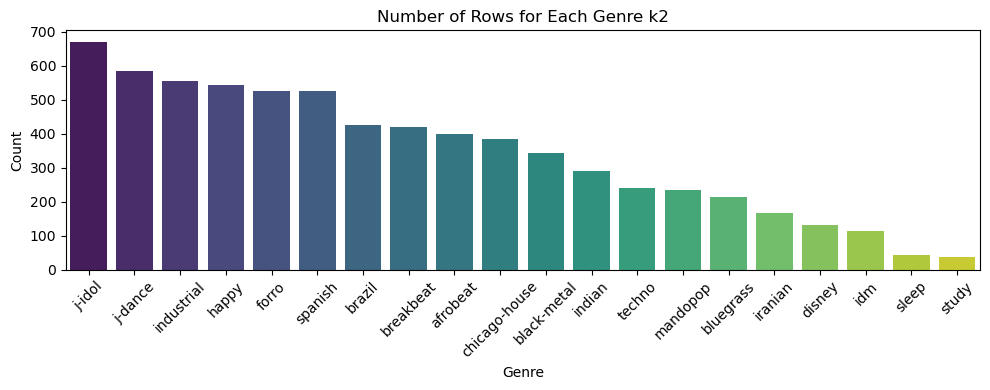

In [41]:
genre_counts = cluster1['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k2')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
#plt.savefig("k1 genre count.png")
plt.show()

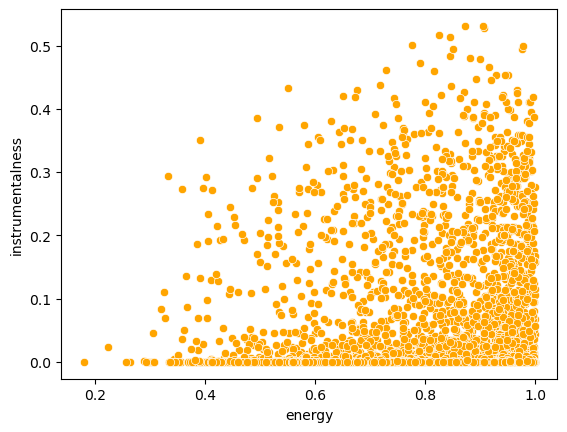

In [42]:
sns.scatterplot(data=cluster1, 
                x="energy", 
                y="instrumentalness", 
                color= 'orange')
#plt.savefig("k1 instr_energy.png")
plt.show()


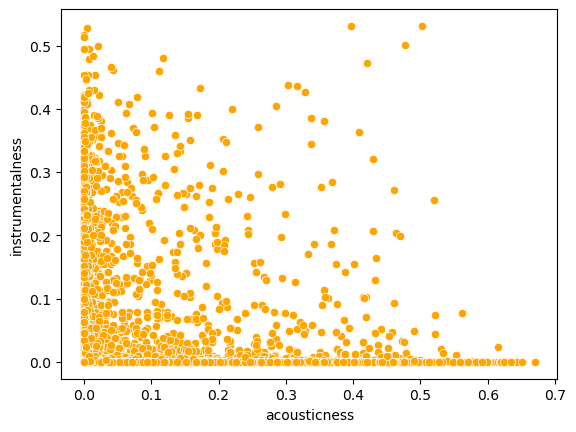

In [43]:
sns.scatterplot(data=cluster1, 
                x="acousticness", 
                y="instrumentalness", 
                color="orange",
               )
#plt.savefig("k1 instr_acous.png")
plt.show()

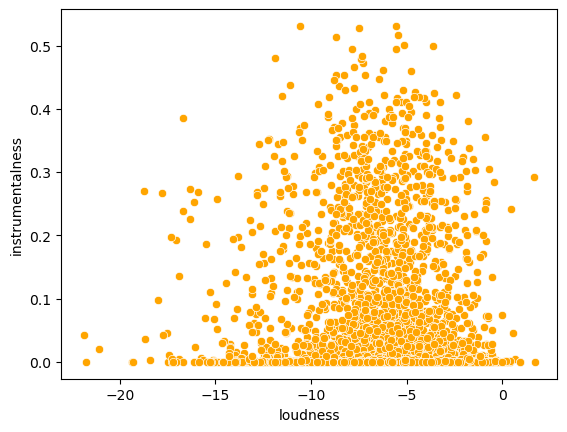

In [44]:
sns.scatterplot(data=cluster1, 
                x="loudness", 
                y="instrumentalness", 
                color="orange",
               )
#plt.savefig("k1 instr_loud.png")
plt.show()

In [45]:
# Create a dictionary to map colors to values
colors = ['orange']

#sns.pairplot(data=cluster1, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k1 MinMax.png")
#plt.show()

#### cluster label 2

In [46]:
cluster2 = df[df['kmeans.labels_'] == 2]
#cluster2 = cluster2.drop('kmeans.labels_std', axis = 1)
cluster2.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
13,知足,256692,0,51,Mayday,知足 just my pride 最真傑作選,0.406,0.230,4,-9.007,0.0297,0.8800,0.000000,0.1070,0.395,159.914,4.0,mandopop,2
18,Three Black Cats,124333,0,14,CoComelon,Halloween Party,0.883,0.395,0,-11.000,0.0404,0.4860,0.000018,0.0979,0.884,135.045,3.0,disney,2
21,Brokedown Palace 9/25: The Caverns - Live,344146,0,20,Greensky Bluegrass,Courage for the Road: Fall 2019 (Live),0.454,0.337,5,-15.906,0.0371,0.7930,0.001480,0.9220,0.249,123.612,4.0,bluegrass,2
41,i loved you first,227067,0,50,joan,i loved you first,0.556,0.276,0,-9.603,0.0269,0.0862,0.000007,0.0999,0.216,75.020,4.0,sleep,2
42,Filho de Davi,353986,0,49,Tony Allysson,Poderoso Deus,0.578,0.635,2,-5.335,0.0278,0.6610,0.000000,0.1380,0.343,137.980,4.0,brazil,2


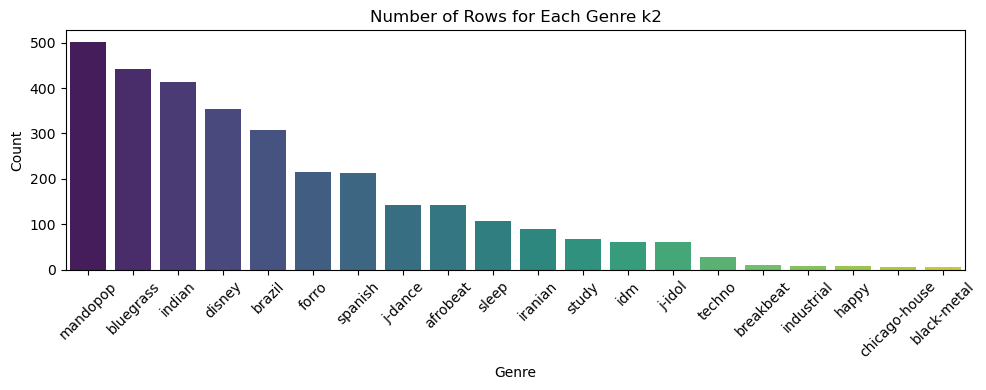

In [47]:
genre_counts = cluster2['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k2')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
#plt.savefig("k2 genre count.png")
plt.show()

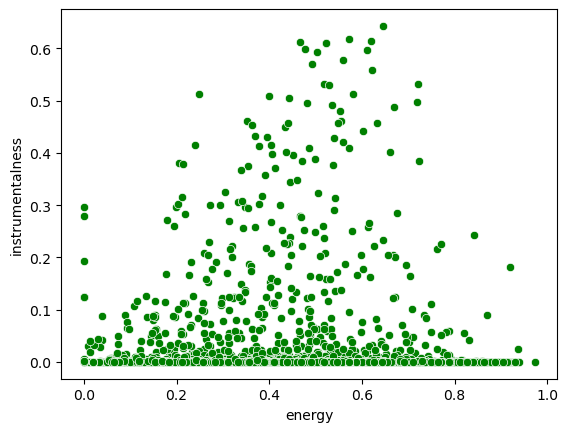

In [48]:
sns.scatterplot(data=cluster2, 
                x="energy", 
                y="instrumentalness", 
                color="green",
               )
#plt.savefig("k2 instr_energy.png")
plt.show()

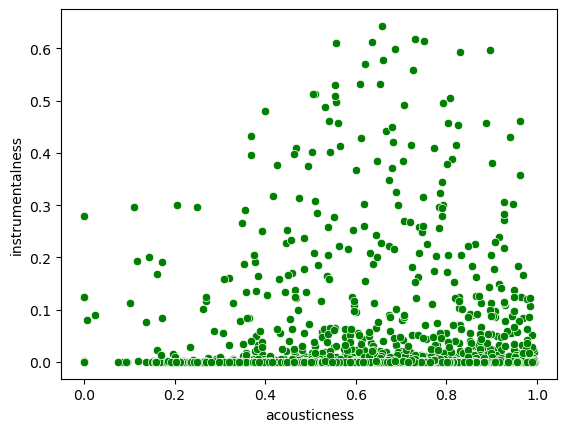

In [49]:
sns.scatterplot(data=cluster2, 
                x="acousticness", 
                y="instrumentalness", 
                color="green",
               )
#plt.savefig("k2 instr_acous.png")
plt.show()

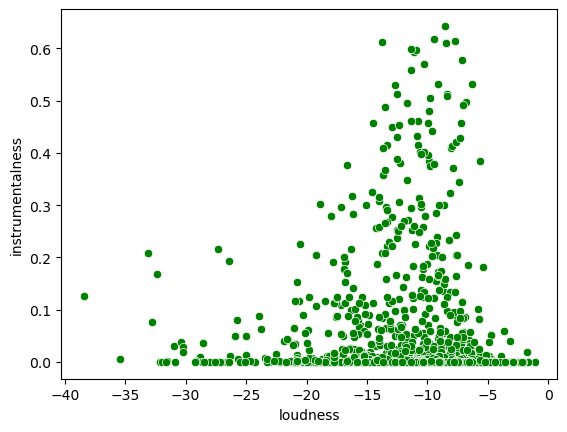

In [50]:
sns.scatterplot(data=cluster2, 
                x="loudness", 
                y="instrumentalness", 
                color="green",
               )
#plt.savefig("k2 instr_loud.png")
plt.show()

In [51]:
# Create a dictionary to map colors to values
colors = ['green']

#sns.pairplot(data=cluster2, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k2 MinMax.png")
#plt.show()

#### cluster label 3

In [52]:
cluster3 = df[df['kmeans.labels_'] == 3]
#cluster2 = cluster2.drop('kmeans.labels_std', axis = 1)
cluster3.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,kmeans.labels_
0,Long Road,241760,0,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,0.0975,0.302000,0.536,0.2810,0.635,142.221,4.0,j-dance,3
2,Ondskapens Galakse,333506,0,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,0.0397,0.000089,0.800,0.2620,0.489,116.628,4.0,black-metal,3
10,Gammy Elbow - VIP Mix,191296,0,19,DJ Zinc;Chris Lorenzo,Gammy Elbow (VIP Mix),0.924,0.893,7,-2.567,0.1910,0.016600,0.859,0.0907,0.613,129.999,4.0,j-dance,3
11,Nobody Supposed to Be Here,99526,0,21,Kyle Edwards;DJ Smallz 732,Warning,0.885,0.750,6,-8.859,0.1730,0.087800,0.963,0.0453,0.406,140.079,4.0,techno,3
19,Dust till Dawn,134000,0,45,Dusty Decks,Solid Centre,0.747,0.571,10,-6.985,0.1190,0.026400,0.888,0.1020,0.710,89.960,4.0,study,3


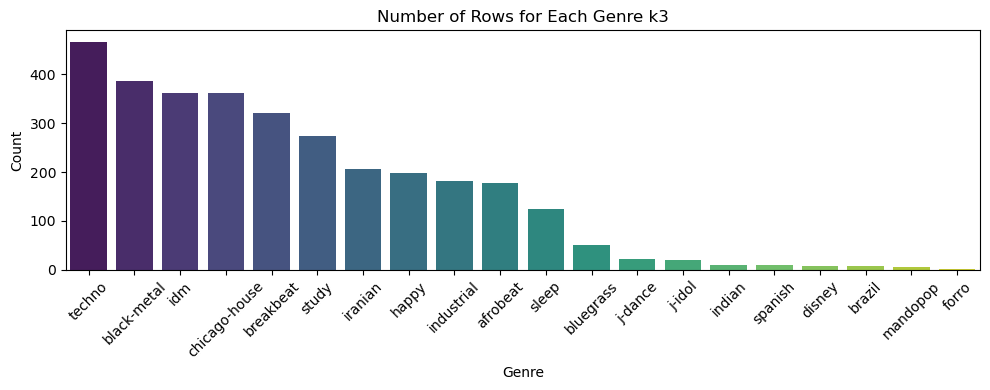

In [53]:
genre_counts = cluster3['genre'].value_counts()

# Plotting the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Number of Rows for Each Genre k3')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
#plt.savefig("k3 genre count.png")
plt.show()

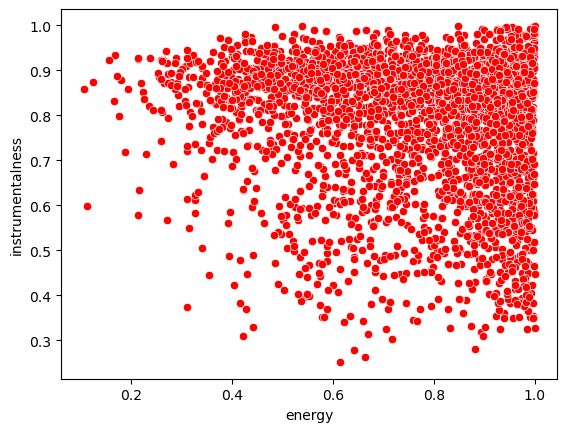

In [54]:
sns.scatterplot(data=cluster3, 
                x="energy", 
                y="instrumentalness", 
                color="red",
               )
#plt.savefig("k3 instr_energy.png")
plt.show()

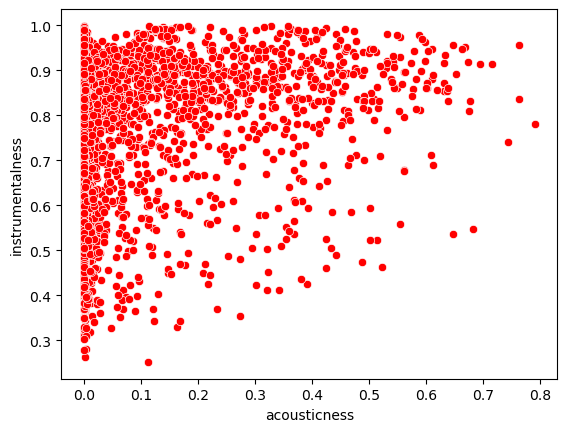

In [55]:
sns.scatterplot(data=cluster3, 
                x="acousticness", 
                y="instrumentalness", 
                color="red",
               )
#plt.savefig("k3 instr_acous.png")
plt.show()

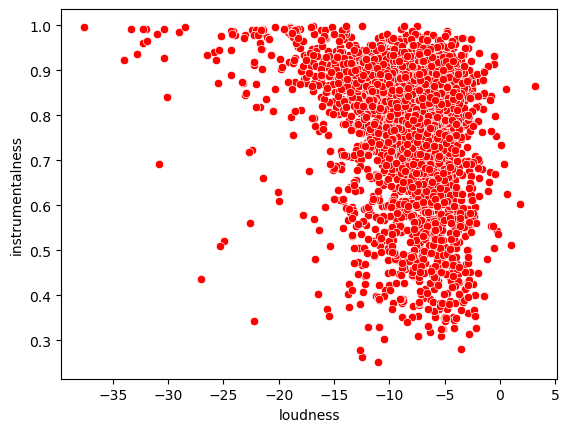

In [56]:
sns.scatterplot(data=cluster3, 
                x="loudness", 
                y="instrumentalness", 
                color="red",
               )
#plt.savefig("k3 instr_loud.png")
plt.show()

In [57]:
# Create a dictionary to map colors to values
colors = ['red']

#sns.pairplot(data=cluster3, hue= 'kmeans.labels_', palette=colors)
#plt.savefig("k2 MinMax.png")
#plt.show()

In [58]:
#cluster0 = df[df["kmeans.labels_"] == 0]
#np.unique(cluster0["genre"],return_counts=True)

In [59]:
# Assuming 'kmeans.labels_' contains the cluster labels in your DataFrame
# Replace 'kmeans.labels_' with the actual column name that stores cluster labels in your DataFrame

# Iterate through clusters 0 to 3
for cluster_num in range(4):  # This will loop through clusters 0 to 3 (total 4 clusters: 0, 1, 2, 3)
    cluster = df[df["kmeans.labels_"] == cluster_num]
    unique_genres, genre_counts = np.unique(cluster["genre"], return_counts=True)
    
    # Sort genres by count in decreasing order
    sorted_indices = np.argsort(genre_counts)[::-1]
    unique_genres_sorted = unique_genres[sorted_indices]
    genre_counts_sorted = genre_counts[sorted_indices]
    
    print(f"Cluster {cluster_num}:")
    for genre, count in zip(unique_genres_sorted, genre_counts_sorted):
        print(f"Genre: {genre}, Count: {count}")
    print("\n")

Cluster 0:
Genre: sleep, Count: 475
Genre: study, Count: 371
Genre: iranian, Count: 287
Genre: disney, Count: 258
Genre: idm, Count: 215
Genre: bluegrass, Count: 44
Genre: indian, Count: 39
Genre: afrobeat, Count: 32
Genre: black-metal, Count: 15
Genre: techno, Count: 15
Genre: mandopop, Count: 10
Genre: brazil, Count: 9
Genre: forro, Count: 7
Genre: industrial, Count: 6
Genre: spanish, Count: 3
Genre: j-dance, Count: 2
Genre: j-idol, Count: 1


Cluster 1:
Genre: j-idol, Count: 670
Genre: j-dance, Count: 585
Genre: industrial, Count: 554
Genre: happy, Count: 544
Genre: forro, Count: 525
Genre: spanish, Count: 524
Genre: brazil, Count: 425
Genre: breakbeat, Count: 419
Genre: afrobeat, Count: 398
Genre: chicago-house, Count: 383
Genre: black-metal, Count: 343
Genre: indian, Count: 289
Genre: techno, Count: 239
Genre: mandopop, Count: 233
Genre: bluegrass, Count: 215
Genre: iranian, Count: 168
Genre: disney, Count: 130
Genre: idm, Count: 113
Genre: sleep, Count: 43
Genre: study, Count: 37